In [2]:
# import the libaries
from ema_workbench import load_results
# from ema_workbench.analysis import parcoords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from ema_workbench.analysis import prim
import numpy as np
from ema_workbench.util import ema_logging
from ema_workbench.analysis import pairs_plotting, prim

In [3]:
input_filename = 'results/base_case'
results = load_results(input_filename + '.tar.gz')

In [4]:
experiments, outcomes = results
print('shape =', experiments.shape)
display(experiments.head())

shape = (50000, 53)


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,38,155.512644,10.0,0.878331,306.848964,10.0,0.019285,72.636338,1.5,0.530505,...,0,0,0,0,0,0,0,0,No Policy,dikesnet
1,27,145.000173,1.0,0.206666,228.379833,1.0,0.701715,71.718316,1.0,0.217055,...,0,0,0,0,0,0,0,1,No Policy,dikesnet
2,9,267.375920,10.0,0.197389,108.068058,1.5,0.877702,91.149247,10.0,0.564523,...,0,0,0,0,0,0,0,2,No Policy,dikesnet
3,70,242.618115,10.0,0.637657,201.863489,1.0,0.080941,173.354999,1.5,0.858488,...,0,0,0,0,0,0,0,3,No Policy,dikesnet
4,47,138.202786,10.0,0.046533,195.788148,1.5,0.217572,126.053329,1.0,0.528640,...,0,0,0,0,0,0,0,4,No Policy,dikesnet


In [5]:
# load the basecase results

df_base = pd.read_csv("results/base_case_results.csv")
df_base.drop(columns=["Unnamed: 0"],inplace=True)
df_base.head()

,A.1_External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2_External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0,0.000000,0.000000e+00,0,0.829501,9.922399e+08,38,155.512644,10.0,0.878331,...,0,0,0,0,0,0,0,0,No Policy,dikesnet
1,0,1.907177,2.297264e+09,0,0.000000,0.000000e+00,27,145.000173,1.0,0.206666,...,0,0,0,0,0,0,0,1,No Policy,dikesnet
2,0,1.833385,2.168577e+09,0,0.000000,0.000000e+00,9,267.375920,10.0,0.197389,...,0,0,0,0,0,0,0,2,No Policy,dikesnet
3,0,0.057983,6.759253e+07,0,0.809009,7.922040e+08,70,242.618115,10.0,0.637657,...,0,0,0,0,0,0,0,3,No Policy,dikesnet
4,0,1.864585,2.256324e+09,0,0.038394,3.423577e+07,47,138.202786,10.0,0.046533,...,0,0,0,0,0,0,0,4,No Policy,dikesnet


In [6]:
df_base.columns

Index(['A.1_External Costs', 'A.1_Expected Number of Deaths',
       'A.1_Expected Annual Damage', 'A.2_External Costs',
       'A.2_Expected Number of Deaths', 'A.2_Expected Annual Damage',
       'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1',
       'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1',
       'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1',
       'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1',
       'A.4_DikeIncrease 2', 'A

In [7]:
# Our objectives are the following: External Costs, Expected Number of Deaths, Expected Annual Damage
# Per location, so times 2. 
df_outcomes = pd.DataFrame(outcomes)
df_outcomes

,A.1_External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2_External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage
0,0,0.000000,0.000000e+00,0,0.829501,9.922399e+08
1,0,1.907177,2.297264e+09,0,0.000000,0.000000e+00
2,0,1.833385,2.168577e+09,0,0.000000,0.000000e+00
3,0,0.057983,6.759253e+07,0,0.809009,7.922040e+08
4,0,1.864585,2.256324e+09,0,0.038394,3.423577e+07
...,...,...,...,...,...,...
49995,0,0.000000,0.000000e+00,0,0.026595,1.952364e+07
49996,0,0.000000,0.000000e+00,0,0.825573,1.105406e+09
49997,0,0.000000,0.000000e+00,0,0.038885,3.368051e+07
49998,0,0.000000,0.000000e+00,0,0.011532,7.734283e+06


In [8]:
df_outcomes

,A.1_External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2_External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage
0,0,0.000000,0.000000e+00,0,0.829501,9.922399e+08
1,0,1.907177,2.297264e+09,0,0.000000,0.000000e+00
2,0,1.833385,2.168577e+09,0,0.000000,0.000000e+00
3,0,0.057983,6.759253e+07,0,0.809009,7.922040e+08
4,0,1.864585,2.256324e+09,0,0.038394,3.423577e+07
...,...,...,...,...,...,...
49995,0,0.000000,0.000000e+00,0,0.026595,1.952364e+07
49996,0,0.000000,0.000000e+00,0,0.825573,1.105406e+09
49997,0,0.000000,0.000000e+00,0,0.038885,3.368051e+07
49998,0,0.000000,0.000000e+00,0,0.011532,7.734283e+06


[[Text(0, 0, '')]]

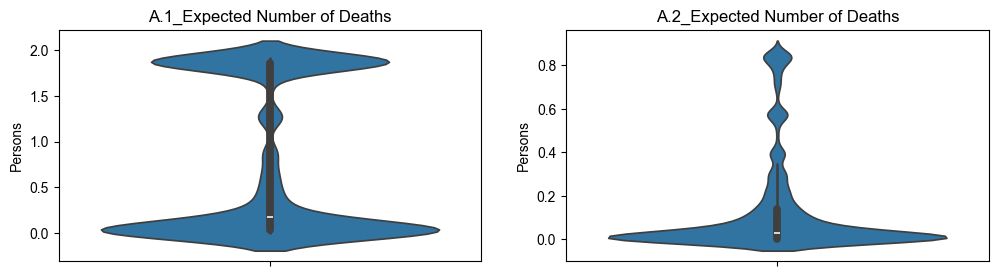

In [9]:
# #First we are going to look at the totals

# plotting the number of deaths and the damage costs (aggregated over time and location)
f, axes = plt.subplots(1, 2, figsize=(12,3))
sns.set(style="whitegrid", font_scale=1)
plt.rcParams["axes.labelsize"] = 15

sns.violinplot(data=df_outcomes["A.1_Expected Number of Deaths"], ax=axes[0])
sns.violinplot(data=df_outcomes["A.2_Expected Number of Deaths"], ax=axes[1])

#layout of the plots
axes[0].set_title("A.1_Expected Number of Deaths")
axes[0].set_ylabel('Persons')
axes[0].set(xticklabels = [])

axes[1].set_title("A.2_Expected Number of Deaths")
axes[1].set_ylabel('Persons')
axes[1].set(xticklabels = [])

In [10]:
outcomes_of_interest = list(df_outcomes.columns)
outcomes_of_interest_A1 = [i for i in outcomes_of_interest if 'A.1' in i]
outcomes_of_interest_A2 = [i for i in outcomes_of_interest if 'A.2' in i]

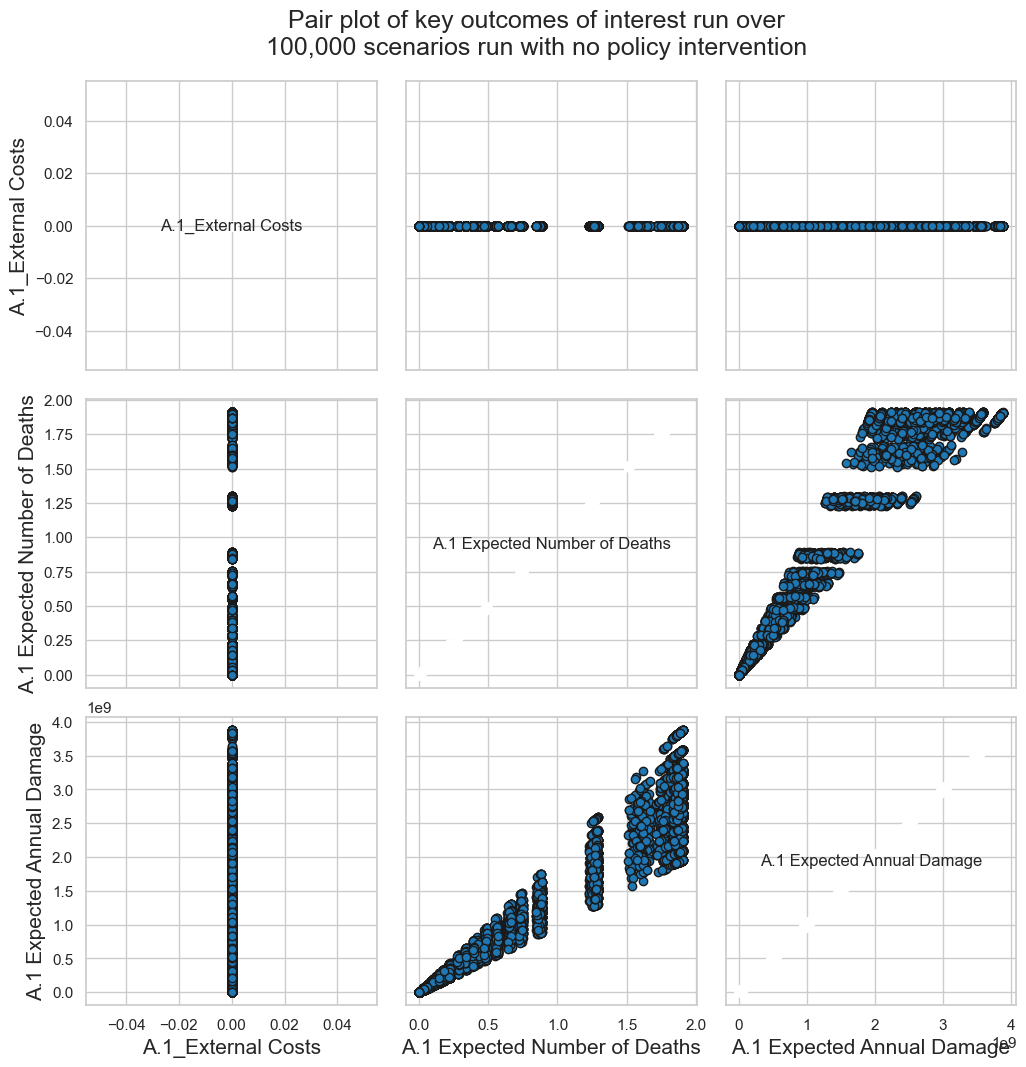

In [12]:
# Subset & rename data columns for readability
outcomes_subset = {k:outcomes[k] for k in outcomes_of_interest_A1 if k in outcomes}

ylabels = {
    'A.1_External Costs' : 'A.1_External Costs',
    'A.1_Expected Number of Deaths' : 'A.1 Expected Number of Deaths',
    'A.1_Expected Annual Damage' : 'A.1 Expected Annual Damage',
    # 'A.2_External Costs' : 'A.2_External Costs',
    # 'A.2_Expected Number of Deaths' : 'A.2 Expected Number of Deaths',
    # 'A.2_Expected Annual Damage' : 'A.2 Expected Annual Damage'
        }

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes_subset,
                                         legend=True, ylabels=ylabels,
                                         linewidth=0,
                                        )

# Graph settings
fig.set_size_inches(12, 12)
fig.suptitle("Pair plot of key outcomes of interest run over\n"
             + "100,000 scenarios run with no policy intervention",
             fontsize=18, y=0.94)
# plt.savefig('img/scenario_discovery__outcomes_pairplot.png')
plt.show()

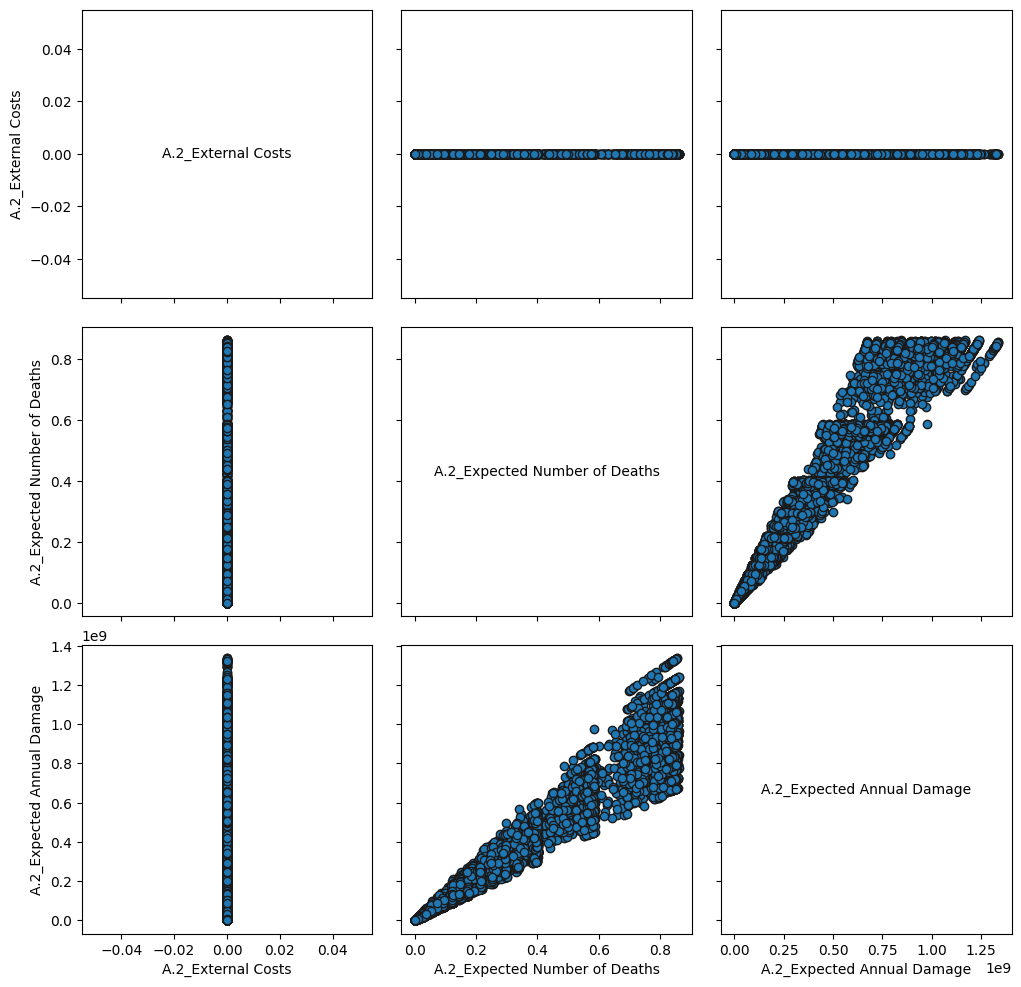

In [22]:
# Dit is van de emaworkbench, dus niet gebruikt van oud-report
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes_subset, group_by="policy", legend=False)
fig.set_size_inches(12, 12)
plt.show()

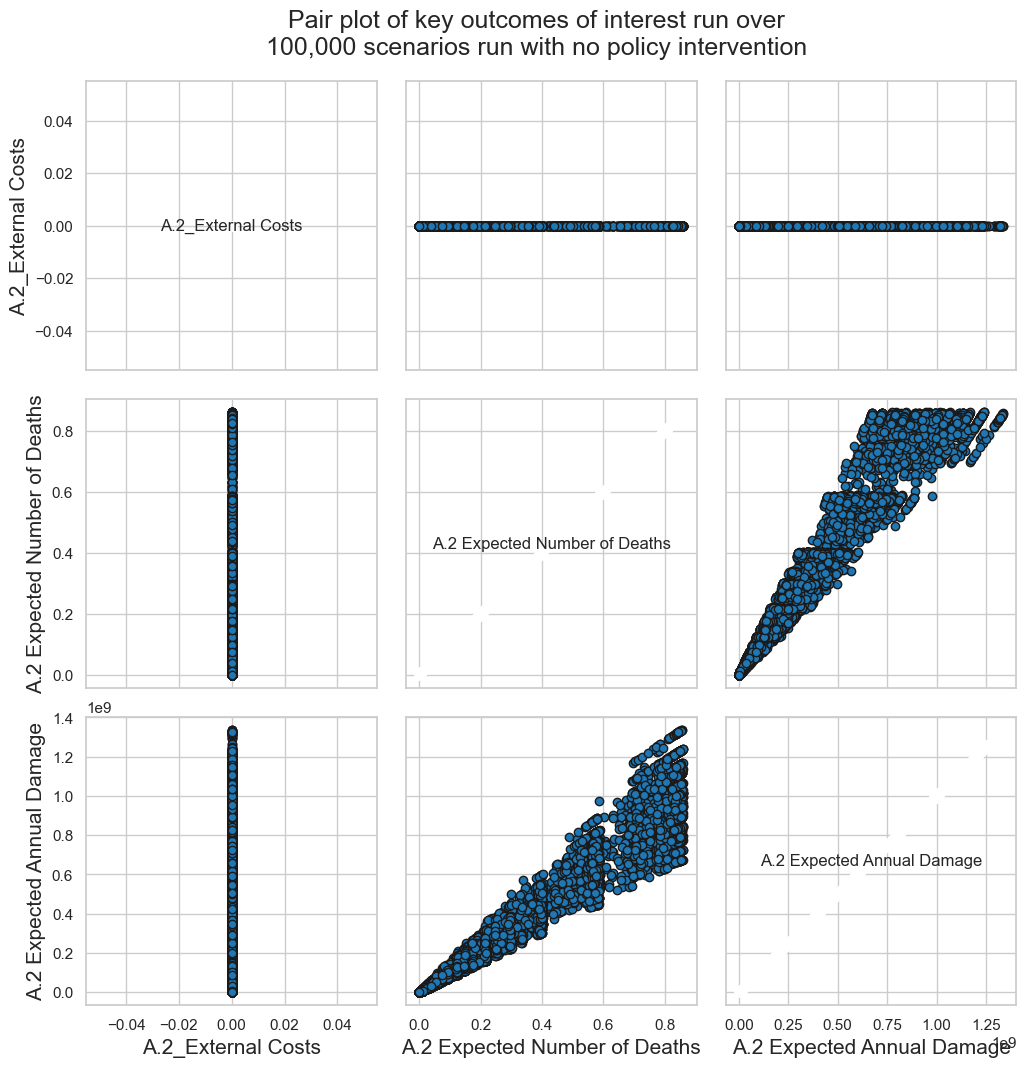

In [13]:
# Subset & rename data columns for readability
outcomes_subset = {k:outcomes[k] for k in outcomes_of_interest_A2 if k in outcomes}

ylabels = {
    # 'A.1_External Costs' : 'A.1_External Costs',
    # 'A.1_Expected Number of Deaths' : 'A.1 Expected Number of Deaths',
    # 'A.1_Expected Annual Damage' : 'A.1 Expected Annual Damage',
    'A.2_External Costs' : 'A.2_External Costs',
    'A.2_Expected Number of Deaths' : 'A.2 Expected Number of Deaths',
    'A.2_Expected Annual Damage' : 'A.2 Expected Annual Damage'
        }

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes_subset,
                                         legend=True, ylabels=ylabels,
                                         linewidth=0,
                                        )

# Graph settings
fig.set_size_inches(12, 12)
fig.suptitle("Pair plot of key outcomes of interest run over\n"
             + "100,000 scenarios run with no policy intervention",
             fontsize=18, y=0.94)
# plt.savefig('img/scenario_discovery__outcomes_pairplot.png')
plt.show()

In [14]:
df_outcomes

,A.1_External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2_External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage
0,0,0.000000,0.000000e+00,0,0.829501,9.922399e+08
1,0,1.907177,2.297264e+09,0,0.000000,0.000000e+00
2,0,1.833385,2.168577e+09,0,0.000000,0.000000e+00
3,0,0.057983,6.759253e+07,0,0.809009,7.922040e+08
4,0,1.864585,2.256324e+09,0,0.038394,3.423577e+07
...,...,...,...,...,...,...
49995,0,0.000000,0.000000e+00,0,0.026595,1.952364e+07
49996,0,0.000000,0.000000e+00,0,0.825573,1.105406e+09
49997,0,0.000000,0.000000e+00,0,0.038885,3.368051e+07
49998,0,0.000000,0.000000e+00,0,0.011532,7.734283e+06


In [54]:
experiments_sliced = experiments.iloc[:,:19]
experiments_sliced

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,38,155.512644,10.0,0.878331,306.848964,10.0,0.019285,72.636338,1.5,0.530505,195.546169,10.0,0.418477,233.292746,10.0,0.131035,2.5,4.5,1.5
1,27,145.000173,1.0,0.206666,228.379833,1.0,0.701715,71.718316,1.0,0.217055,315.827632,1.5,0.536738,317.172696,1.5,0.659842,2.5,4.5,4.5
2,9,267.375920,10.0,0.197389,108.068058,1.5,0.877702,91.149247,10.0,0.564523,199.342726,1.5,0.103240,115.936667,1.0,0.336643,3.5,4.5,3.5
3,70,242.618115,10.0,0.637657,201.863489,1.0,0.080941,173.354999,1.5,0.858488,72.834263,10.0,0.295168,342.168398,1.5,0.653396,3.5,2.5,4.5
4,47,138.202786,10.0,0.046533,195.788148,1.5,0.217572,126.053329,1.0,0.528640,210.285469,1.0,0.621793,185.606387,10.0,0.171505,4.5,2.5,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,87,153.320394,10.0,0.951109,346.011268,10.0,0.786560,237.267215,10.0,0.118990,318.456048,1.0,0.763465,322.952401,10.0,0.614975,3.5,4.5,4.5
49996,88,109.487639,1.5,0.863328,77.308983,10.0,0.002728,92.310055,1.0,0.843542,259.039979,1.0,0.627374,334.881831,10.0,0.216766,2.5,1.5,2.5
49997,117,97.809314,10.0,0.896549,95.033153,1.5,0.666172,299.913656,1.0,0.426011,285.009716,10.0,0.017047,204.845373,1.0,0.221829,3.5,2.5,4.5
49998,40,307.229142,1.5,0.984833,345.438616,1.5,0.995549,282.171100,10.0,0.073887,317.923798,10.0,0.853705,214.374224,1.0,0.811638,4.5,4.5,4.5


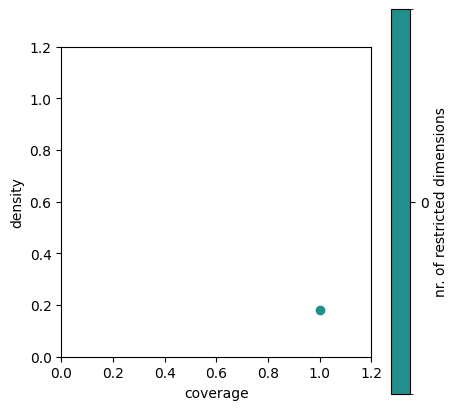

In [16]:
# Setting the upper 25% range for the total number of deaths and  damage costs 

percentile_damage_A1 = np.percentile(df_outcomes["A.1_Expected Annual Damage"], 75)
percentile_deaths_A1 = np.percentile(df_outcomes["A.1_Expected Number of Deaths"], 75)

# Bool the values if they are larger than the threshold
selval = pd.DataFrame()
selval["Cost25p"] = df_outcomes["A.1_Expected Annual Damage"] > percentile_damage_A1
selval["Death25p"] = df_outcomes["A.1_Expected Number of Deaths"] > percentile_deaths_A1

# If cost and deaths are in the 75th upper percentiles indicate true
y1 = selval["Cost25p"] & selval["Death25p"] 
# y1.to_csv('./worst_scenarios_PRIM.csv')

# Execute prim algorithm
# We select the value for peel_alpha by trial and error such that we get all the dimensions as output 
# as well as a threshold above 0.65
prim_alg = prim.Prim(experiments_sliced, y1, threshold=0.8, peel_alpha=0.2)
box1 = prim_alg.find_box()

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (5,5)

# Show trade off plot
box1.show_tradeoff()



#plt.savefig("PRIM_tradeoff_scenarios")
plt.show()

In [47]:
x = experiments_sliced
y = df_outcomes["A.1_Expected Annual Damage"] > percentile_damage_A1
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.2)
box1 = prim_alg.find_box()

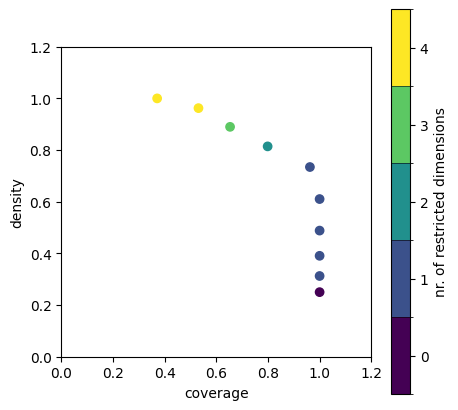

In [48]:
box1.show_tradeoff()
plt.show()

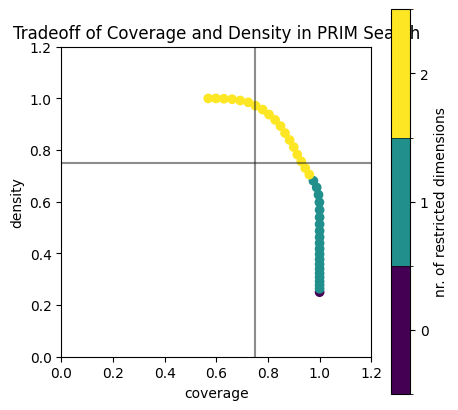

In [63]:
uncertainties = experiments.columns.tolist()
ooi = 'A.2_Expected Annual Damage'
performance_threshold = np.percentile(df_outcomes[ooi], 75)
prim_alg = prim.setup_prim(results,
                           classify=lambda y: y[ooi] > performance_threshold,
                           threshold=0.75,
                           incl_unc=uncertainties,
                           mass_min=0.01
                           )
box1 = prim_alg.find_box()
box1.show_tradeoff()

plt.hlines(y=[0.75], xmin=0, xmax=1.2, colors='k', alpha=0.5)
plt.vlines(x=[0.75], ymin=0, ymax=1.2, colors='k', alpha=0.5)
plt.title('Tradeoff of Coverage and Density in PRIM Search')
# plt.savefig('img/scenario_discovery__prim_trajectory.png')
plt.show()

In [64]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.00000,0.250000,0,1.00000,0.250000,0
1,1.00000,0.263158,1,0.95000,0.263158,1
2,1.00000,0.277008,2,0.90250,0.277008,1
3,1.00000,0.291593,3,0.85736,0.291593,1
4,1.00000,0.306944,4,0.81448,0.306944,1
5,1.00000,0.323106,5,0.77374,0.323106,1
6,1.00000,0.340118,6,0.73504,0.340118,1
7,1.00000,0.358023,7,0.69828,0.358023,1
8,1.00000,0.376869,8,0.66336,0.376869,1
9,1.00000,0.396712,9,0.63018,0.396712,1


In [65]:
candidates = box1.peeling_trajectory
candidates = candidates[(candidates.coverage > 0.75)
                         & (candidates.density > 0.75)]
candidates

,coverage,density,id,mass,mean,res_dim
23,0.92904,0.756005,23,0.30722,0.756005,2
24,0.91352,0.782552,24,0.29184,0.782552,2
25,0.89992,0.811499,25,0.27724,0.811499,2
26,0.88376,0.838928,26,0.26336,0.838928,2
27,0.86632,0.865697,27,0.25018,0.865697,2
28,0.84872,0.892788,28,0.23766,0.892788,2
29,0.82784,0.916726,29,0.22576,0.916726,2
30,0.80416,0.937424,30,0.21446,0.937424,2
31,0.77952,0.956607,31,0.20372,0.956607,2
32,0.75208,0.971579,32,0.19352,0.971579,2


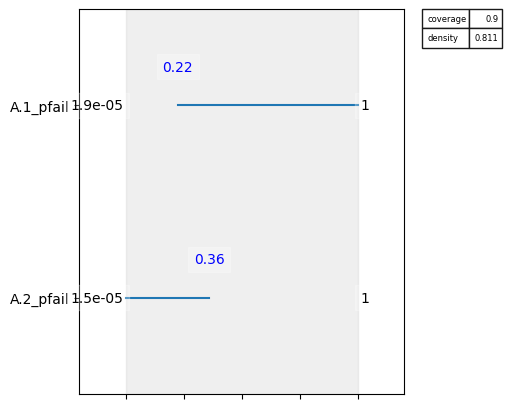

In [66]:
box1.inspect(25, style='graph', ticklabel_formatter='{}', boxlim_formatter='{:.2g}')
# box1.inspect(5)
#plt.savefig("PRIM_boxinspect_scenarios")
plt.show()

c:\Users\pepij\anaconda3\envs\MBDM\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


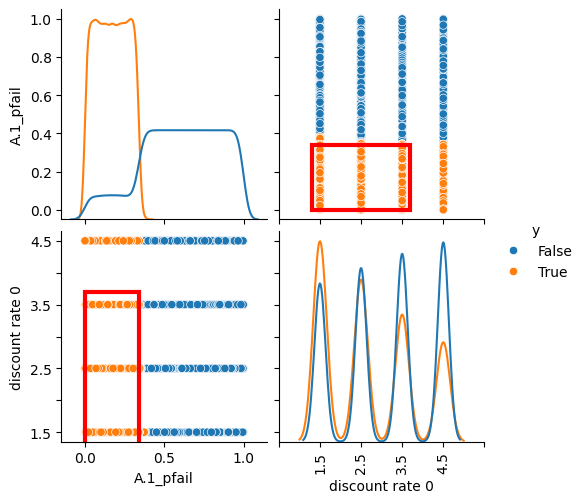

In [62]:
box1.show_pairs_scatter(22)
plt.show()